#### Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'


### Dataset Link-
#### https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [152]:
df=pd.read_csv(r"C:\Users\User\Desktop/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

#### This data contains the deatils of wine in which all the columns are numerical  .Here "quality" is the traget variable in which more than 2 catogeries are present.Here we need to predict the wine quality using the classification models.

In [153]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [154]:
df.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [155]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
34              5.2              0.32         0.25             1.8      0.103   
1417            7.3              0.34         0.33             2.5      0.064   
1147           10.0              0.41         0.45             6.2      0.071   
700            10.6              1.02         0.43             2.9      0.076   
1124            6.5              0.58         0.00             2.2      0.096   
1134            8.5              0.28         0.35             1.7      0.061   
18              7.4              0.59         0.08             4.4      0.086   
1357            7.3              0.43         0.24             2.5      0.078   
1276            8.5              0.40         0.40             6.3      0.050   
157             7.1              0.43         0.42             5.5      0.071   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
34                   13.0                  50.0  0.99570  3.38       0.55   
1417                 21.0                  37.0  0.99520  3.35       0.77   
1147                  6.0                  14.0  0.99702  3.21       0.49   
700                  26.0                  88.0  0.99840  3.08       0.57   
1124                  3.0                  13.0  0.99557  3.62       0.62   
1134                  6.0                  15.0  0.99524  3.30       0.74   
18                    6.0                  29.0  0.99740  3.38       0.50   
1357                 27.0                  67.0  0.99648  3.60       0.59   
1276                  3.0                  10.0  0.99566  3.28       0.56   
157                  28.0                 128.0  0.99730  3.42       0.71   

      alcohol  quality  
34        9.2        5  
1417     12.1        7  
1147     11.8        7  
700      10.1        6  
1124     11.5        4  
1134     11.8        7  
18        9.0        4  
1357     11.1        6  
1276     12.0        4  
157      10.5        5

### Exploratory Data Analysis

In [156]:
df.shape

(1599, 12)

#### This data set contains 1599 rows and 12 columns out of which 1 is dependent variable and 11 columns are independent variable.

In [157]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [158]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [159]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [161]:
#checking the number of unique value in each column
df.nunique().to_frame("No.of unique values")

No.of unique values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 6

In [162]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [163]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [164]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### from the above description we can observe the following:-
  ####  1)The count of all values are same which means there is no missing values in all of the column.
  
  
  #### 2)The mean value is grater than median(50%) in  all of the column so dat is skewed to right in all columns
      
    
   
    
  ####  4)By summarizing the data we can observe  that there is a huge difference between the 75% and max hence there are outliers are present in the data.
    
   #### 5)We acn also notice the standarddeviation,mean and 25%percentile value from the describe method.
    

In [165]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Data Visualization 

### Univariate Analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

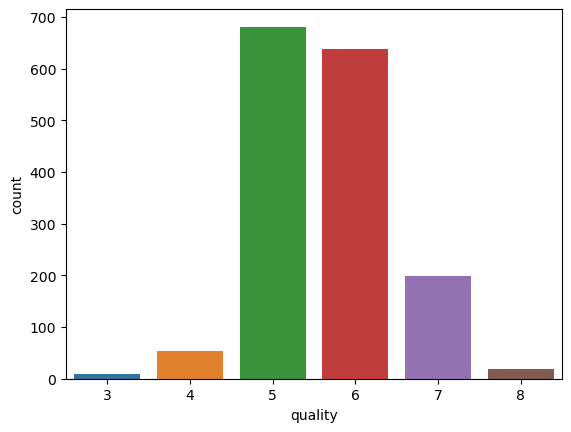

In [166]:
ax=sns.countplot(df['quality'])
df['quality'].value_counts()

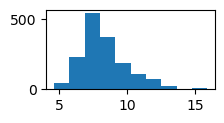

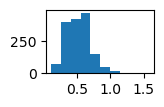

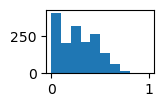

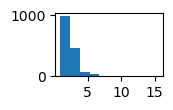

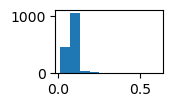

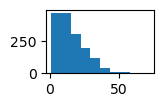

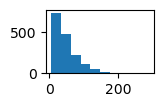

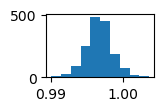

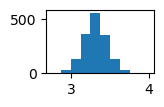

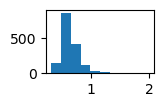

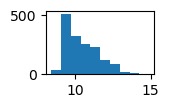

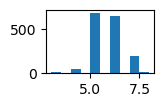

In [167]:

plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=13:
        ax=plt.subplot(5,4,plotnumber)
        ax=plt.hist(df[col])
        
        plotnumber+=1
        plt.show()

### Lets see how the data is distributed in each column

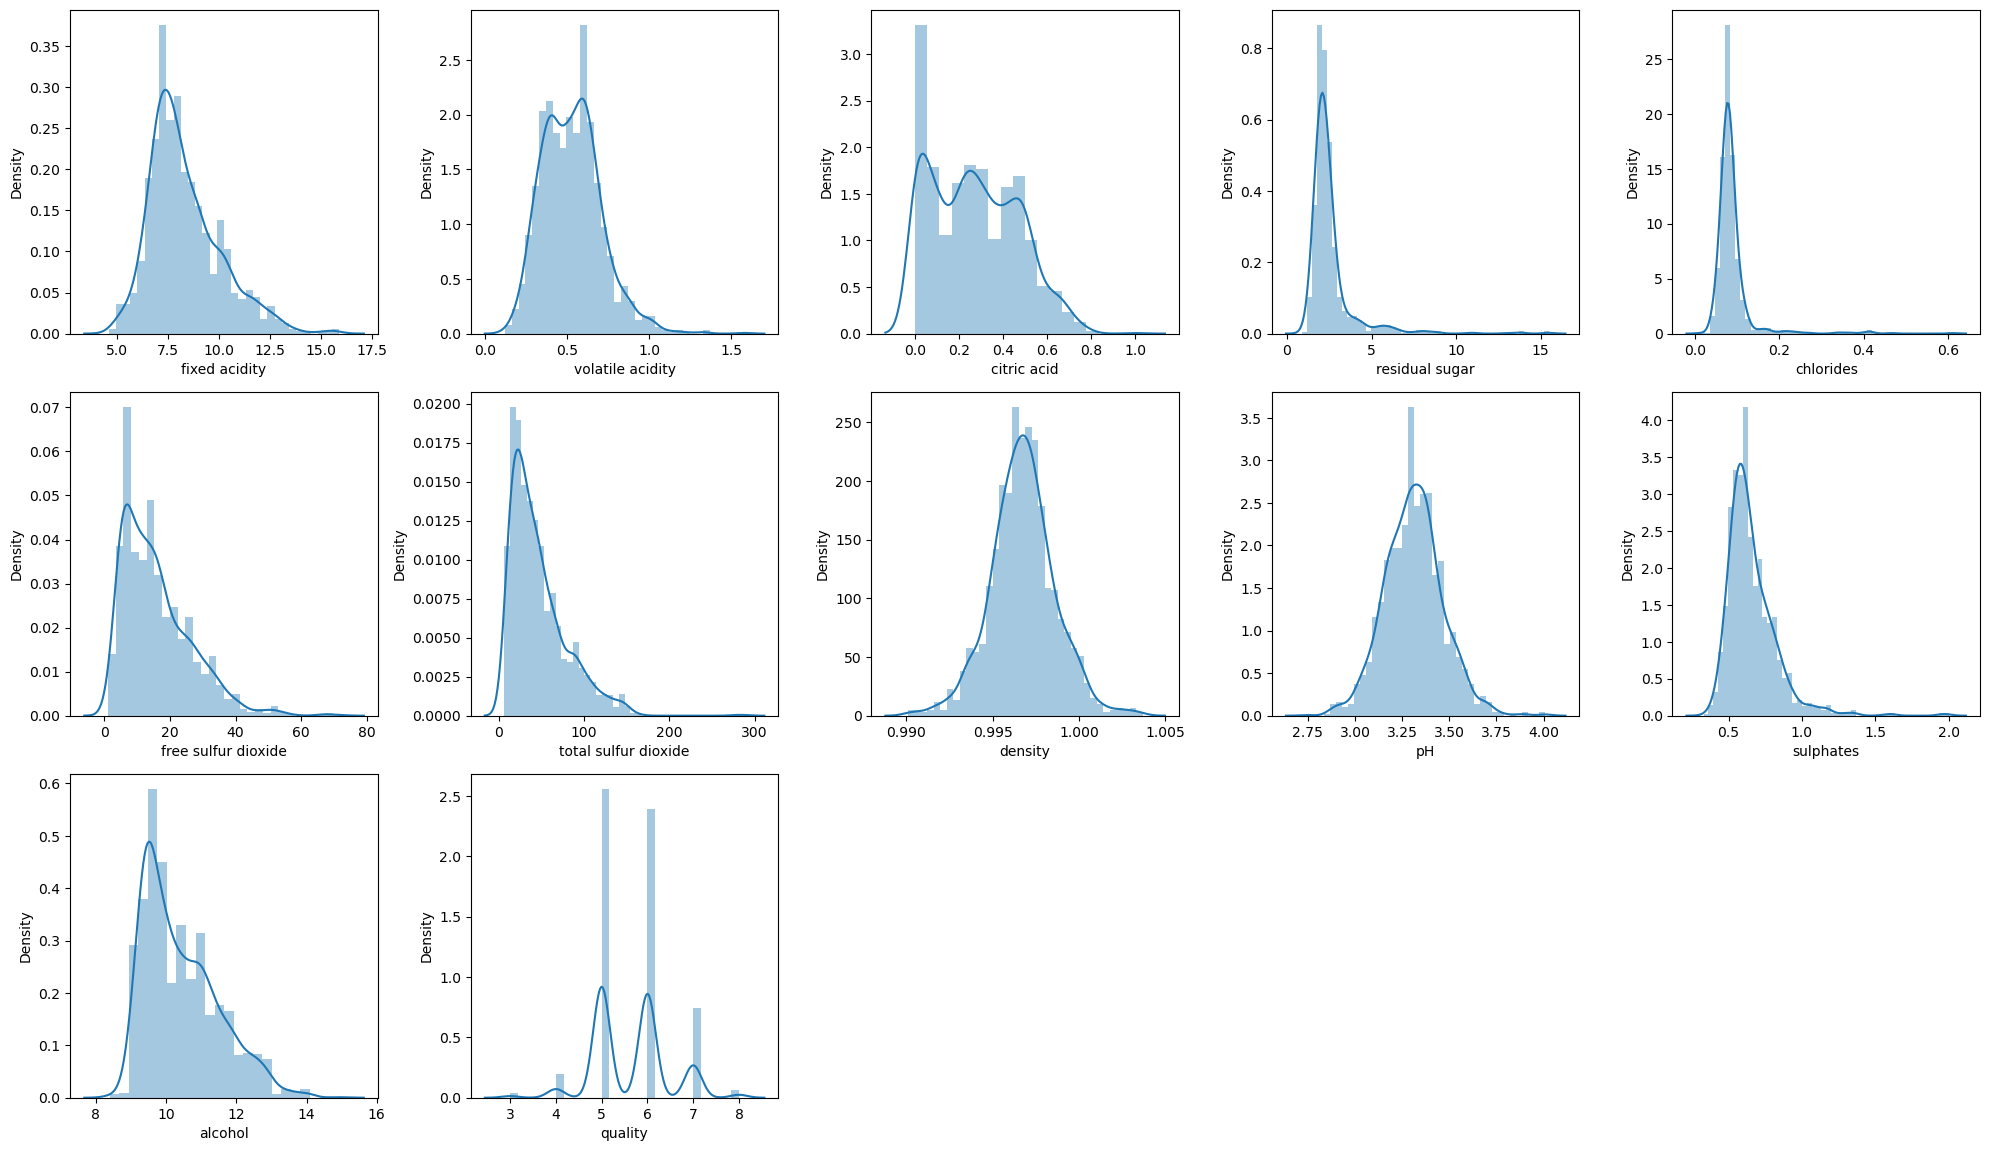

In [168]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[column])
        
        
        plotnumber+=1
        plt.tight_layout()

In [169]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### We can clearly see from the dist plot that in the column fixed acidity,volatile acodity,residual sugar,chlorides,free sulphur dioxide,total sulfur dioxide,sulphates,alcohol the data is skewed to right,so we can remove the skewness in these column.

IndexError: Boolean index has wrong length: 7 instead of 4

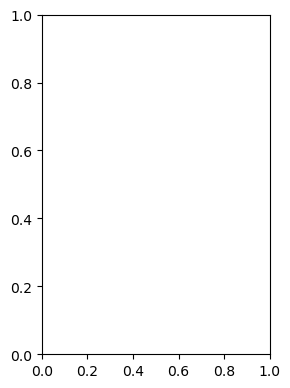

In [170]:
plt.figure(figsize=(10,15))
plotnumber=1


for column in x:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
        plotnumber+=1
        plt.show()
           

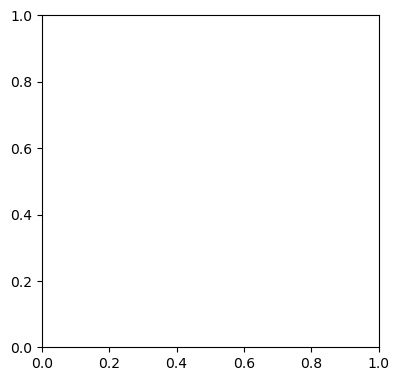

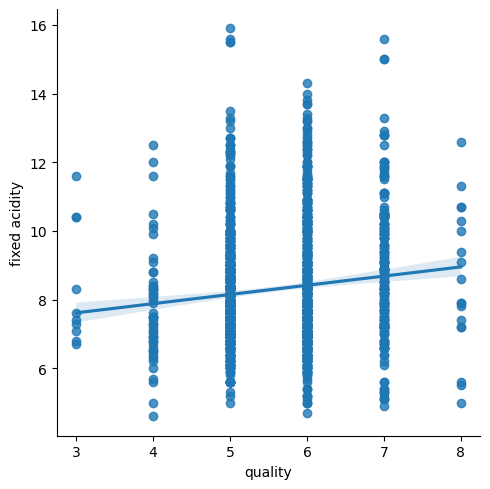

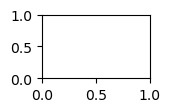

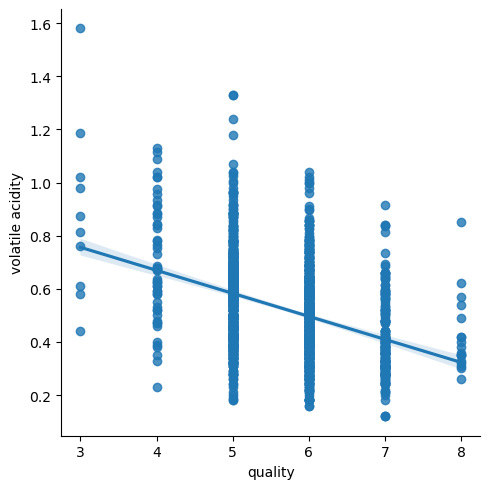

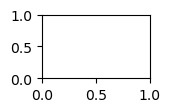

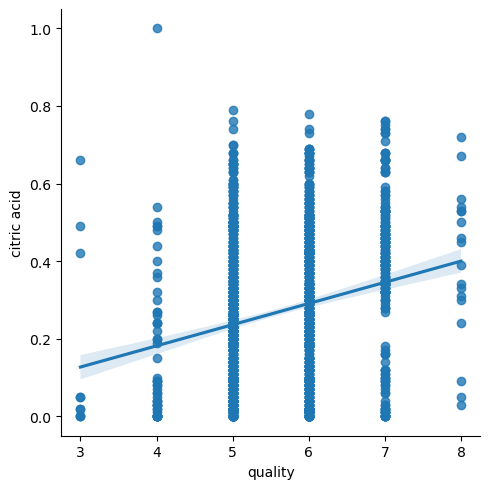

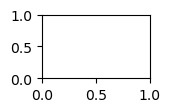

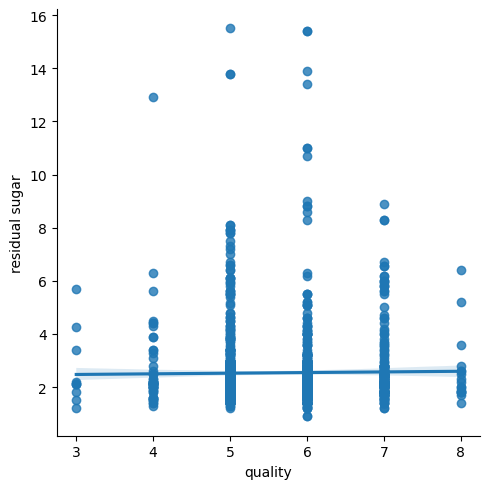

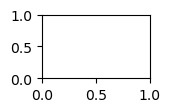

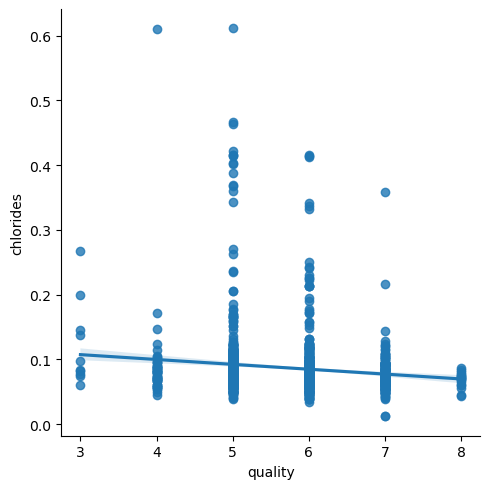

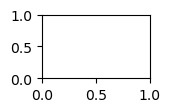

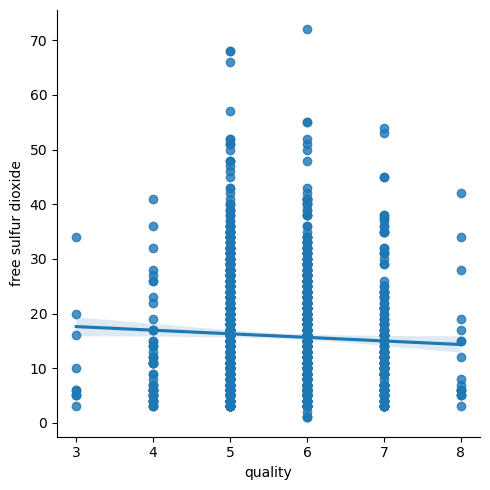

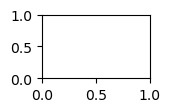

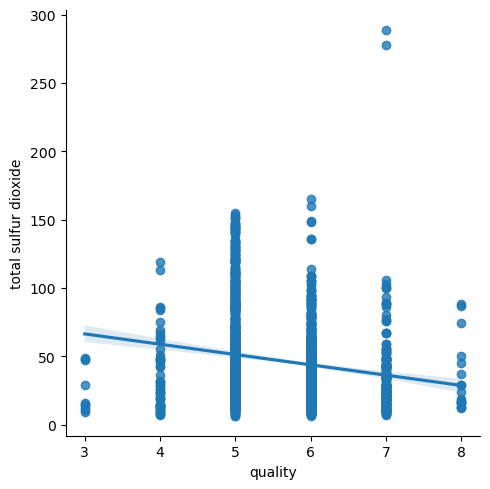

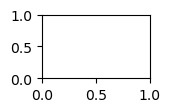

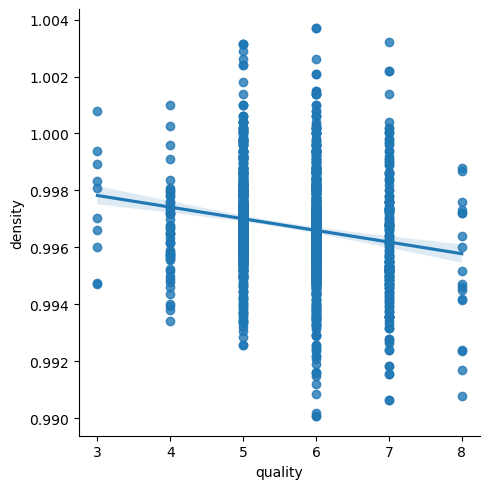

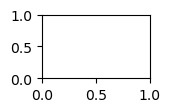

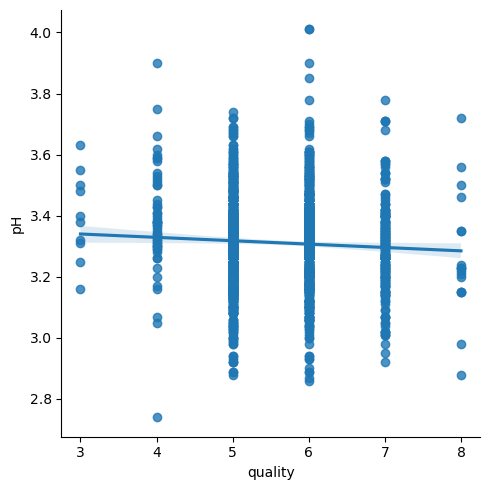

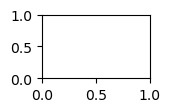

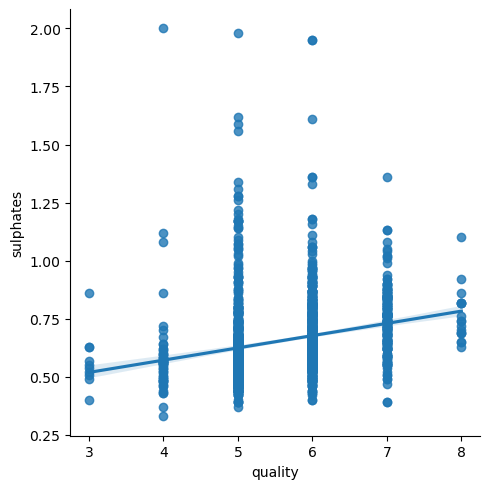

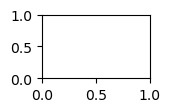

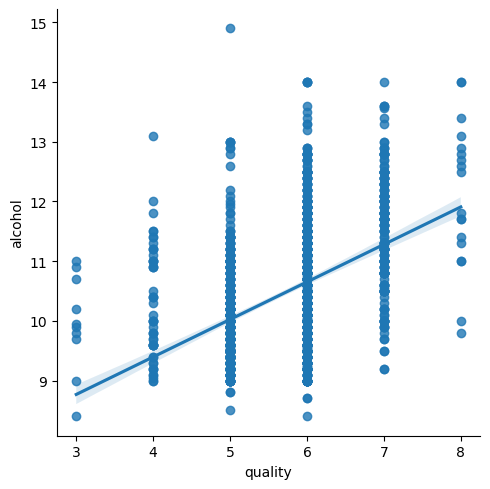

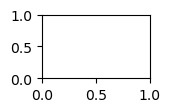

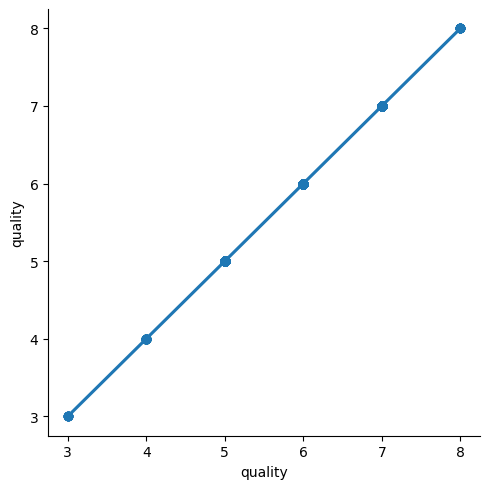

In [171]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=13:
        plt.subplot(5,4,plotnumber)
        sns.lmplot(x='quality',y=i,data=df)
        
    plotnumber+=1
    plt.show()
    
    
    

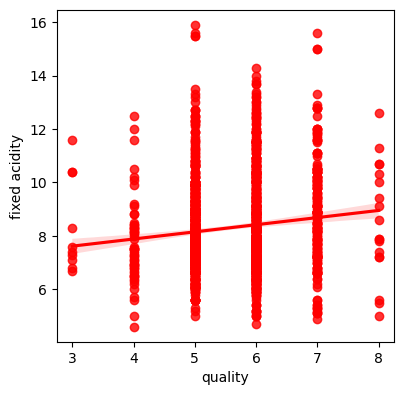

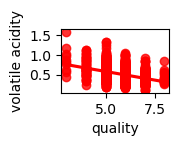

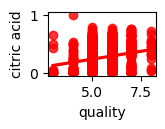

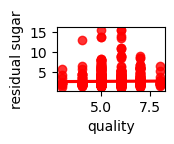

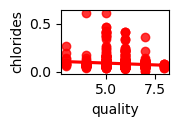

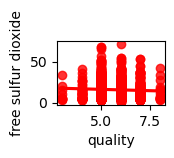

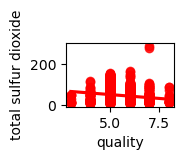

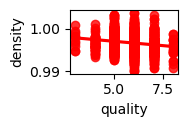

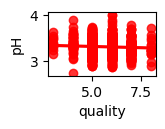

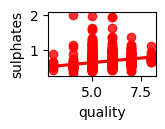

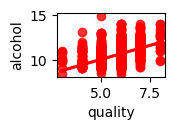

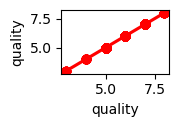

In [172]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=17:
        plt.subplot(5,4,plotnumber)
        sns.regplot(x='quality',y=i,data=df,color='r')
        
    plotnumber+=1
    plt.show()
    
    
    

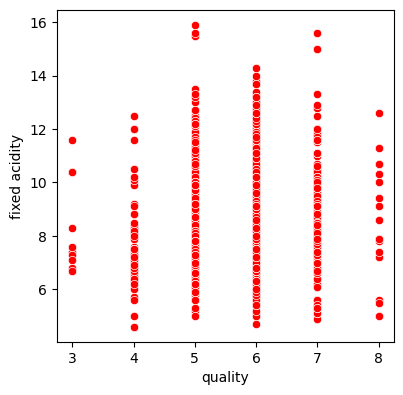

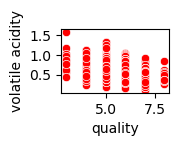

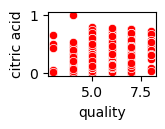

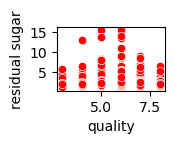

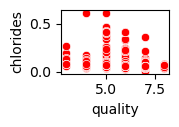

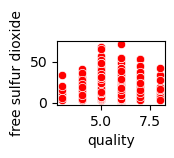

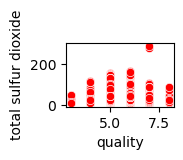

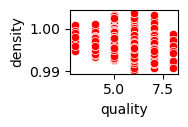

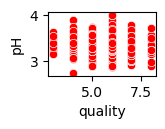

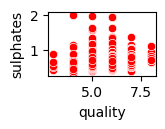

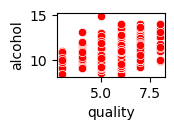

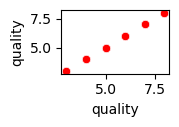

In [173]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=17:
        plt.subplot(5,4,plotnumber)
        sns.scatterplot(x='quality',y=i,data=df,color='r')
        
    plotnumber+=1
    plt.show()
    
    
    

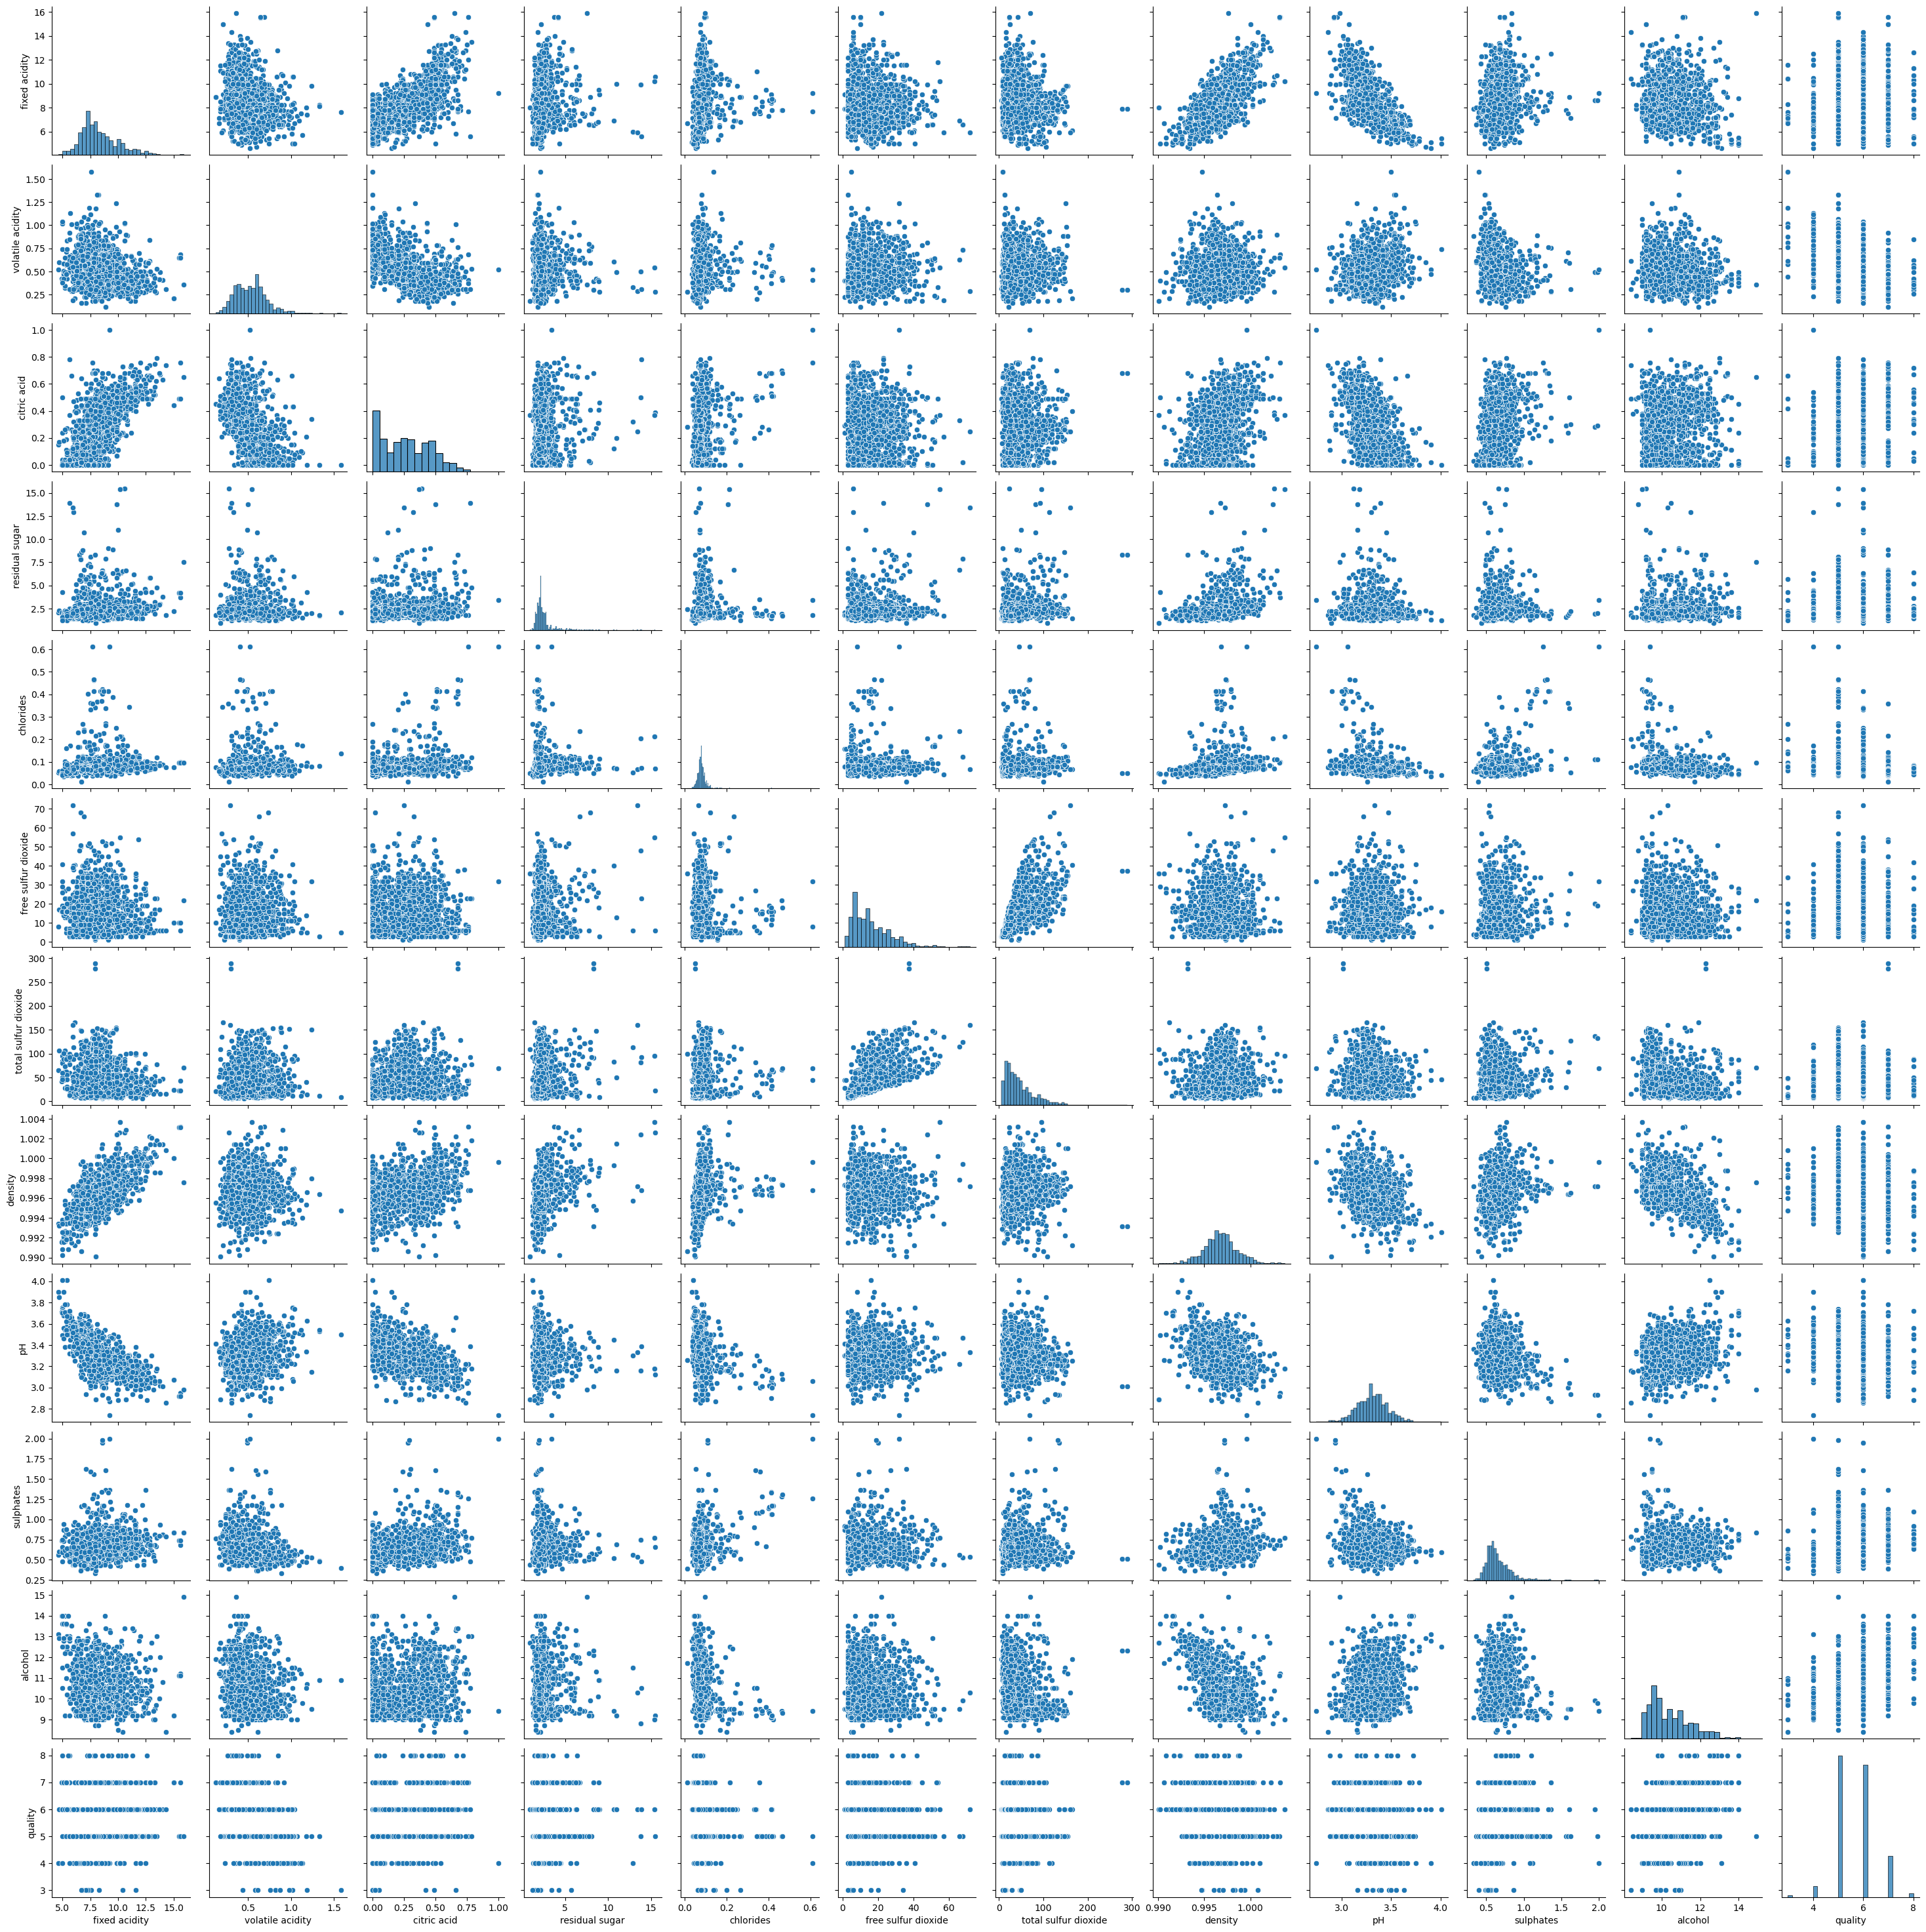

In [174]:
sns.pairplot(data=df,palette="Dark2")

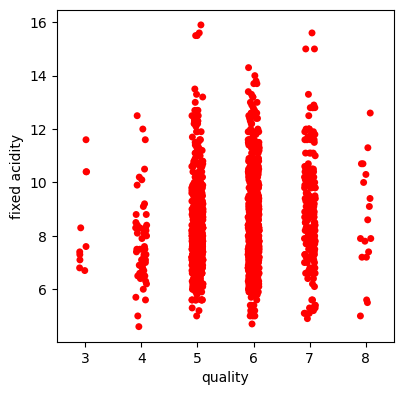

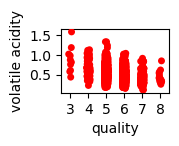

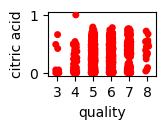

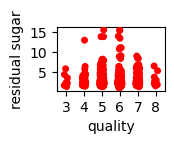

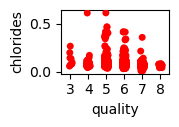

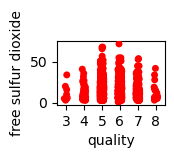

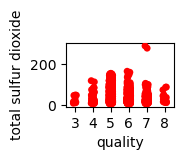

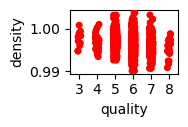

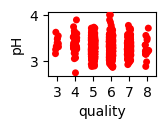

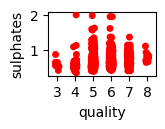

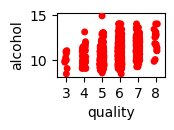

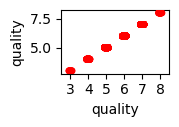

In [175]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=17:
        plt.subplot(5,4,plotnumber)
        sns.stripplot(x='quality',y=i,data=df,color='r')
        
    plotnumber+=1
    plt.show()
    
    
    

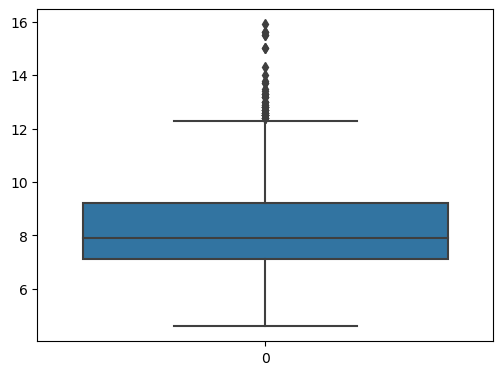

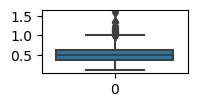

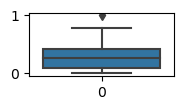

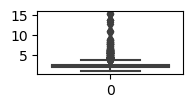

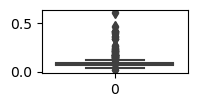

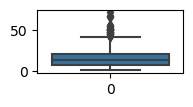

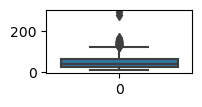

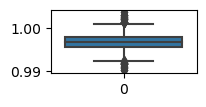

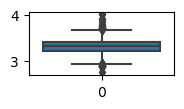

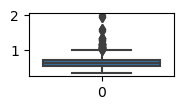

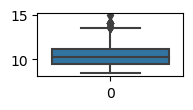

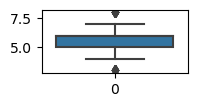

In [176]:
plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=13:
        plt.subplot(5,3,graph)
        ax=sns.boxplot(data=df[column])
        
        
        graph+=1
        plt.show()

In [177]:
from scipy.stats import zscore
out_features=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol']]
z=np.abs(zscore(out_features))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density  sulphates   alcohol  
0                0.466193              0.379133  0.558274   0.579207  0.960246  
1                0.872638              0.624363  0.028261   0.128950  0.584777  
2                0.083669              0.229047  0.134264   0.048089  0.584777  
3                0.107592              0.411500  0.664277   0.461180  0.584777  
4                0.466193              0.379133  0.558274   0.579207  0.960246  
...                   ...                   ...       ...        ...       ...  
1594             1.542054              0.075043  0.978765   0.461180  0.072294  
1595             2.211469              0.137820  0.862162   0.601055  0.729364  
1596             1.255161              0.196679  0.533554   0.542042  0.541630  
1597             1.542054              0.075043  0.676657   0.305990  0.209308  
1598             0.203223              0.135861  0.666057   0.010924  0.541630  

[1599 rows x 10 columns]

#### we can see from the boxplot that all of the columns have a lot of outliers so lets remove the outliers

In [178]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
         120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
         391,  396,  396,  400,  400,  442,  442,  451,  467,  480,  480,
         494,  515,  544,  554,  554,  555,  555,  557,  557,  568,  584,
         588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
         652,  652,  672,  672,  684,  690,  692,  692,  723,  724,  730,
         754,  776,  777,  795,  821,  836,  837,  889,  911,  917,  923,
         925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
        1079, 1081, 1081, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235,
        1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295,
        1296, 1299, 1312, 1319, 1319, 

In [179]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1465, 12)

In [180]:
print("old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame- 1599
New Data Frame- 1465


In [181]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 8.380237648530331


In [182]:
df=df1

In [183]:
df.shape

(1465, 12)

### We remove the outliers lets see again how is data is distributed in each columns

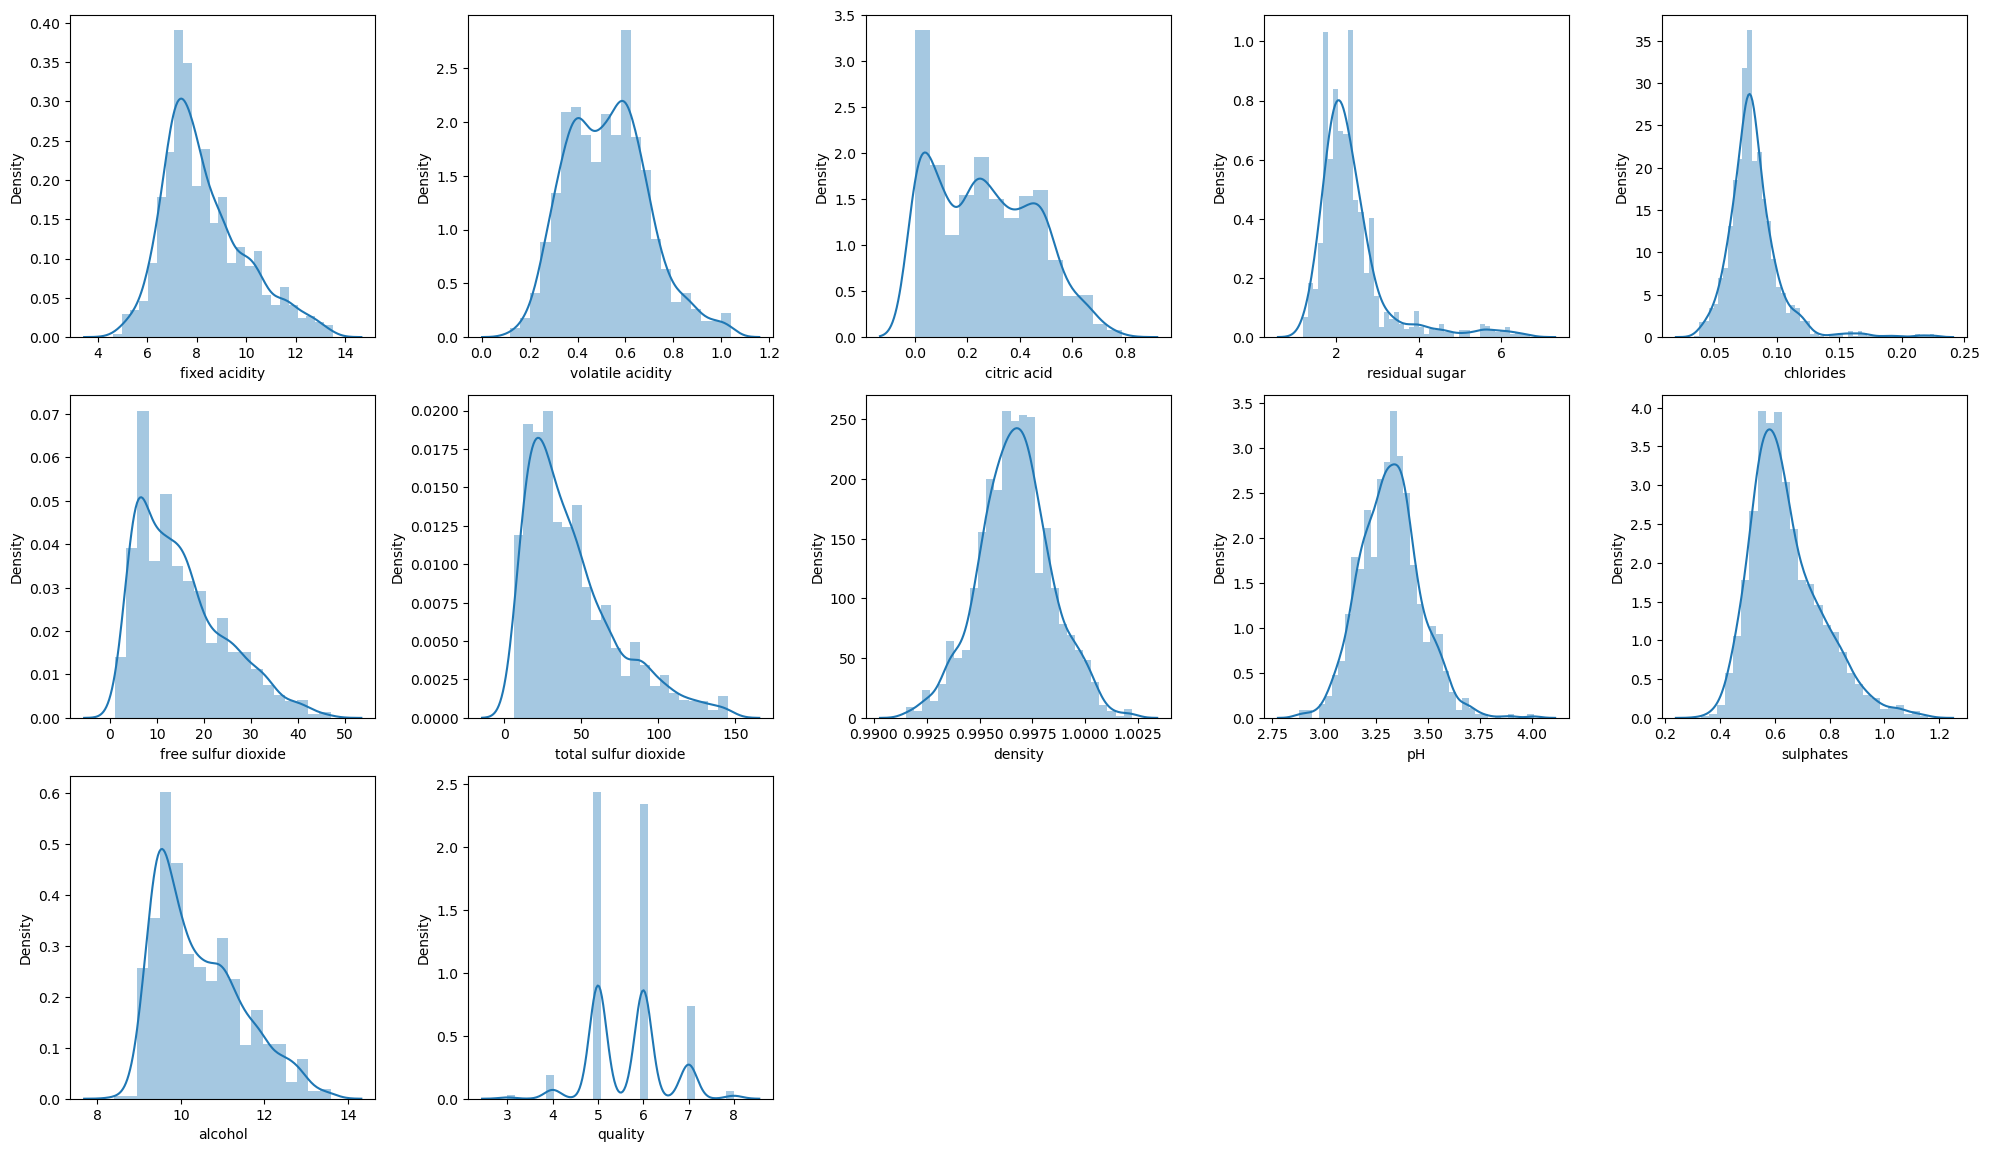

In [184]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[column])
        
        
        plotnumber+=1
        plt.tight_layout()

In [185]:
df.skew()

fixed acidity           0.791266
volatile acidity        0.388565
citric acid             0.297122
residual sugar          2.447710
chlorides               2.273578
free sulfur dioxide     0.869022
total sulfur dioxide    1.182257
density                 0.037632
pH                      0.354182
sulphates               0.898820
alcohol                 0.753354
quality                 0.241250
dtype: float64

### After removing the outliers we can still see some columns in skewed so we can remove theese skewness using cuberoot method.

In [186]:
df['fixed acidity']=np.sqrt(df['fixed acidity'])

In [187]:
df['fixed acidity'].skew()

0.5601794940941276

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

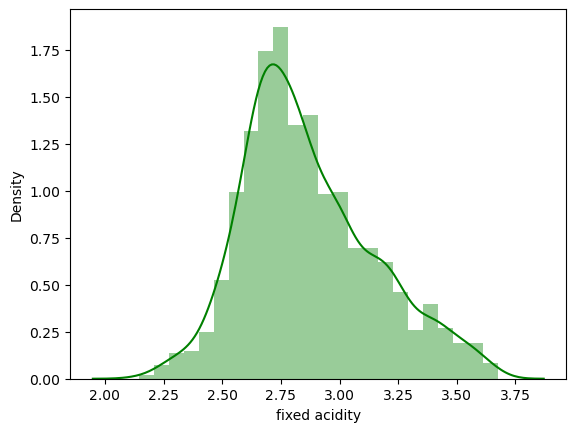

In [188]:
sns.distplot(df['fixed acidity'],color='g')

1.8240377221780535


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

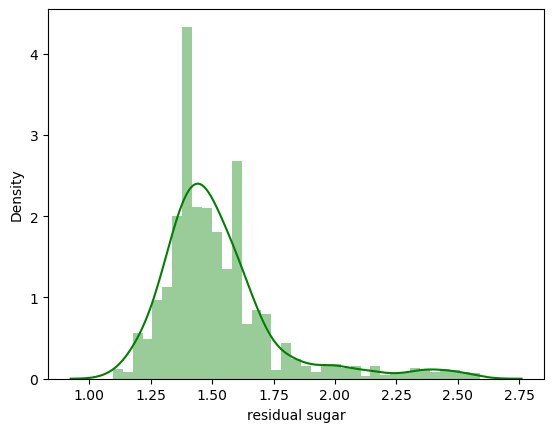

In [189]:
df['residual sugar']=np.sqrt(df['residual sugar'])
print(df['residual sugar'].skew())
sns.distplot(df['residual sugar'],color='g')

0.4681454408532485


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

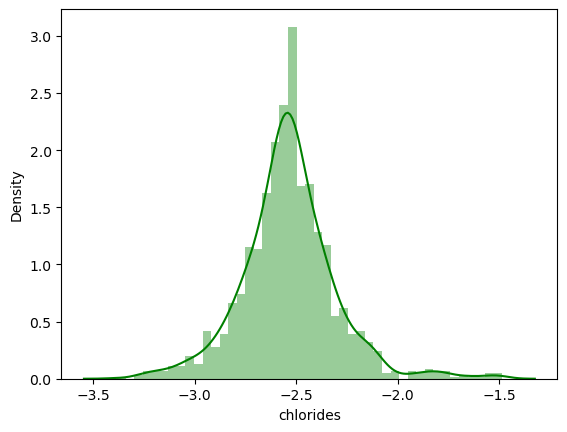

In [190]:
df['chlorides']=np.log(df['chlorides'])
print(df['chlorides'].skew())
sns.distplot(df['chlorides'],color='g')

0.31881994267397623


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

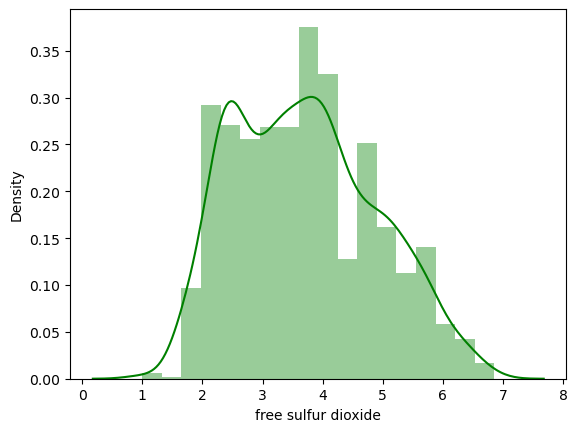

In [191]:
df['free sulfur dioxide']=np.sqrt(df['free sulfur dioxide'])
print(df['free sulfur dioxide'].skew())
sns.distplot(df['free sulfur dioxide'],color='g')

0.5540915123406466


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

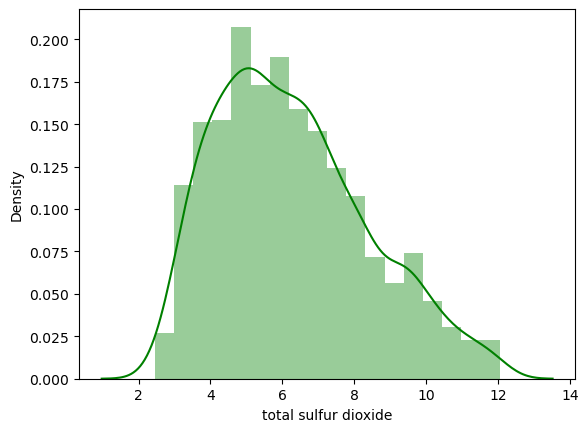

In [192]:
df['total sulfur dioxide']=np.sqrt(df['total sulfur dioxide'])
print(df['total sulfur dioxide'].skew())
sns.distplot(df['total sulfur dioxide'],color='g')

0.5309698276164031


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

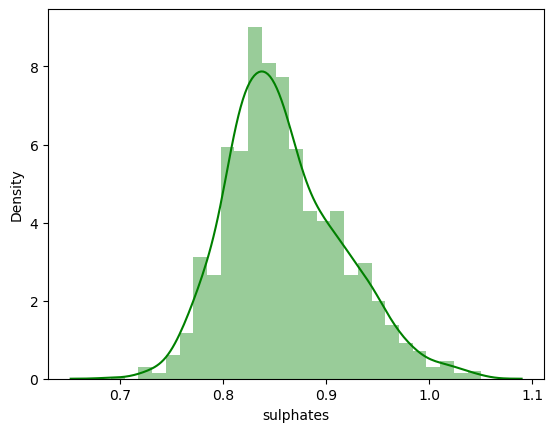

In [193]:
df['sulphates']=np.cbrt(df['sulphates'])
print(df['sulphates'].skew())
sns.distplot(df['sulphates'],color='g')

0.023364643128249818


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

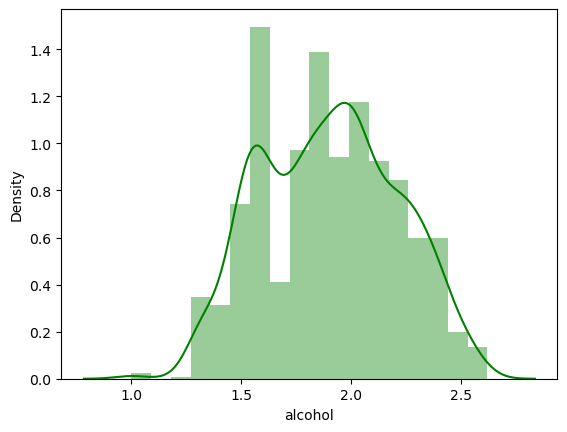

In [194]:
df['alcohol']=np.sqrt(df['free sulfur dioxide'])
print(df['alcohol'].skew())
sns.distplot(df['alcohol'],color='g')

In [195]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1465.000000       1465.000000  1465.000000     1465.000000   
mean        2.866709          0.524369     0.264430        1.524929   
std         0.281126          0.169303     0.191337        0.245554   
min         2.144761          0.120000     0.000000        1.095445   
25%         2.664583          0.390000     0.090000        1.378405   
50%         2.810694          0.520000     0.250000        1.483240   
75%         3.033150          0.635000     0.420000        1.612452   
max         3.674235          1.040000     0.790000        2.588436   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1465.000000          1465.000000           1465.000000  1465.000000   
mean     -2.536908             3.702068              6.265668     0.996702   
std       0.233986             1.179203              2.112471     0.001732   
min      -3.381395             1.000000              2.449490     0.991500   
25%      -2.659260             2.645751              4.582576     0.995600   
50%      -2.538307             3.605551              6.000000     0.996700   
75%      -2.419119             4.582576              7.615773     0.997800   
max      -1.487220             6.855655             12.041595     1.002200   

                pH    sulphates      alcohol      quality  
count  1465.000000  1465.000000  1465.000000  1465.000000  
mean      3.318894     0.859086     1.899182     5.647782  
std       0.146305     0.056064     0.308614     0.801406  
min       2.880000     0.691042     1.000000     3.000000  
25%       3.220000     0.819321     1.626577     5.000000  
50%       3.320000     0.852702     1.898829     6.000000  
75%       3.400000     0.896281     2.140695     6.000000  
max       4.010000     1.050718     2.618330     8.000000

In [196]:
df.corr()


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.297020     0.697104   
volatile acidity          -0.297020          1.000000    -0.589741   
citric acid                0.697104         -0.589741     1.000000   
residual sugar             0.198014          0.032109     0.189134   
chlorides                  0.235936          0.073973     0.112520   
free sulfur dioxide       -0.162101          0.026235    -0.091991   
total sulfur dioxide      -0.103731          0.103274    -0.010553   
density                    0.669632         -0.004753     0.377114   
pH                        -0.719838          0.251496    -0.518209   
sulphates                  0.197761         -0.355232     0.307920   
alcohol                   -0.169155          0.036149    -0.101075   
quality                    0.129438         -0.360891     0.236031   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.198014   0.235936            -0.162101   
volatile acidity            0.032109   0.073973             0.026235   
citric acid                 0.189134   0.112520            -0.091991   
residual sugar              1.000000   0.176538            -0.000422   
chlorides                   0.176538   1.000000            -0.030656   
free sulfur dioxide        -0.000422  -0.030656             1.000000   
total sulfur dioxide        0.093135   0.073407             0.730691   
density                     0.371014   0.403909            -0.042740   
pH                         -0.090962  -0.226558             0.121832   
sulphates                   0.070505   0.003316             0.053991   
alcohol                    -0.001729  -0.031489             0.995971   
quality                     0.050460  -0.144554            -0.062197   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103731  0.669632 -0.719838   0.197761   
volatile acidity                  0.103274 -0.004753  0.251496  -0.355232   
citric acid                      -0.010553  0.377114 -0.518209   0.307920   
residual sugar                    0.093135  0.371014 -0.090962   0.070505   
chlorides                         0.073407  0.403909 -0.226558   0.003316   
free sulfur dioxide               0.730691 -0.042740  0.121832   0.053991   
total sulfur dioxide              1.000000  0.122441  0.022004  -0.019583   
density                           0.122441  1.000000 -0.334542   0.132739   
pH                                0.022004 -0.334542  1.000000  -0.034457   
sulphates                        -0.019583  0.132739 -0.034457   1.000000   
alcohol                           0.736438 -0.043579  0.128620   0.048721   
quality                          -0.209841 -0.177373 -0.077311   0.390326   

                       alcohol   quality  
fixed acidity        -0.169155  0.129438  
volatile acidity      0.036149 -0.360891  
citric acid          -0.101075  0.236031  
residual sugar       -0.001729  0.050460  
chlorides            -0.031489 -0.144554  
free sulfur dioxide   0.995971 -0.062197  
total sulfur dioxide  0.736438 -0.209841  
density              -0.043579 -0.177373  
pH                    0.128620 -0.077311  
sulphates             0.048721  0.390326  
alcohol               1.000000 -0.061775  
quality              -0.061775  1.000000

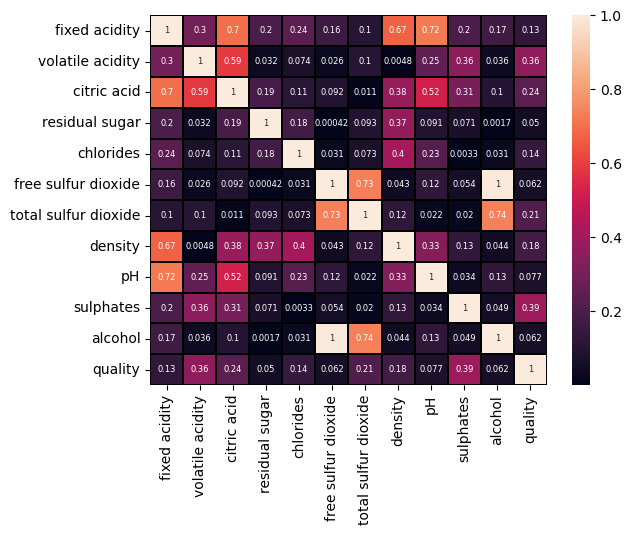

In [197]:
df_corr = df.corr().abs() #This code will get the coefficient of one variable vs other variable(relationship)
plt.figure
sns.heatmap(df_corr,annot= True,annot_kws={'size':6},linecolor='black',linewidth=0.2)
plt.show()

#### This heatmap show the corelation matrix by visualizing the data .we can observe the relation between feature to feature and feature to lable in the heat map.

#### This heatmap contains only positive corelation.

#### Except volatile acidity,citric acid,total sulfur oxide,sulphates features there is no much positive corelation between the traget and features.

#### The column free sulfur oxide and alcohol are perfectly positive corelated with each other.

#### The column alcohol and total sulfur oxide ,free sulfur oxide and total sulfur oxide,pH and acidity and citric acid and fixed acidity 
#### are highly corelated with each other.

#### so we can see that there is multicoliniarity occurs.

### Make sure that these columns are really corelated or Not

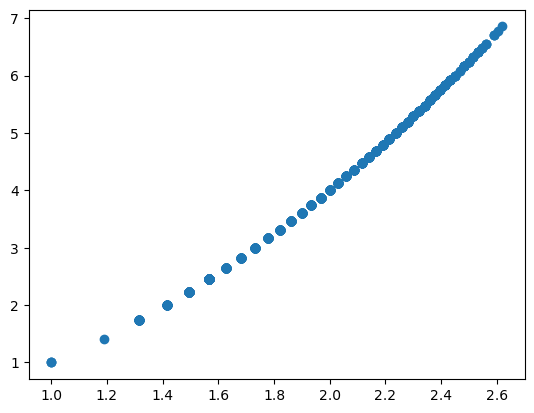

In [198]:
plt.scatter(df['alcohol'],df['free sulfur dioxide'])




plt.show()

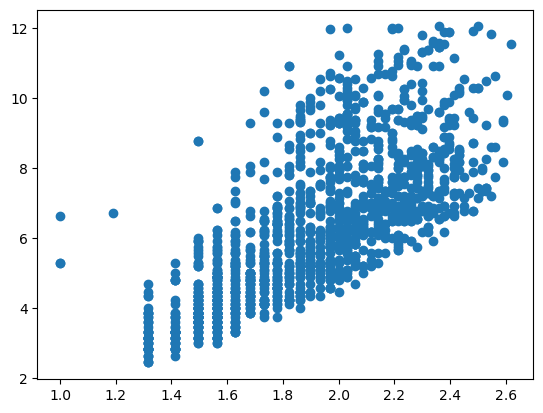

In [199]:
plt.scatter(df['alcohol'],df['total sulfur dioxide'])




plt.show()

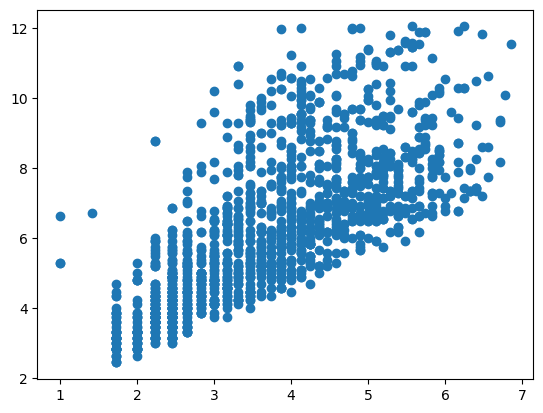

In [200]:
plt.scatter(df['free sulfur dioxide'],df['total sulfur dioxide'])




plt.show()

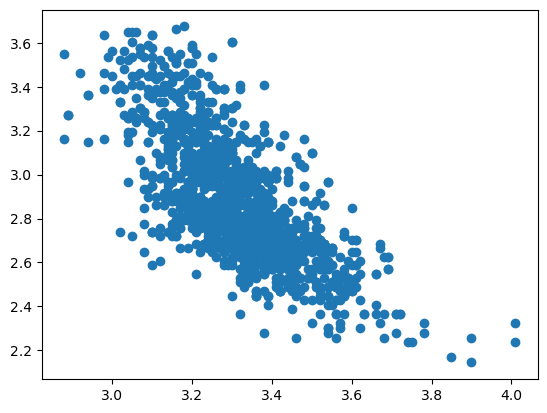

In [201]:
plt.scatter(df['pH'],df['fixed acidity'])




plt.show()

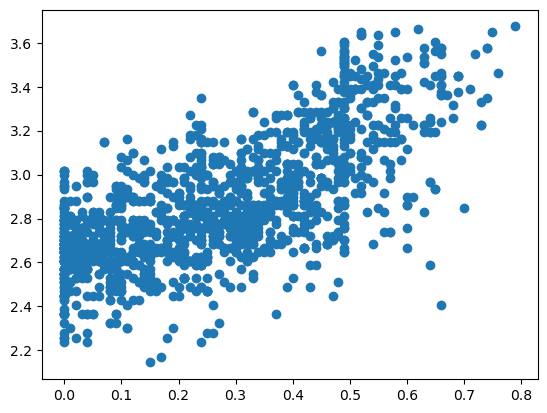

In [202]:
plt.scatter(df['citric acid'],df['fixed acidity'])




plt.show()

### Seperating features and lable

In [203]:
x=df.drop("quality",axis=1)
y=df["quality"]

### Feature scaling using standard scaler

In [204]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.520993          1.037736    -1.382487       -0.596913  -0.171497   
1         -0.262821          2.101285    -1.382487        0.356549   0.915410   
2         -0.262821          1.392252    -1.173360       -0.034034   0.645306   
3          1.707759         -1.443877     1.545293       -0.596913  -0.228124   
4         -0.520993          1.037736    -1.382487       -0.596913  -0.171497   
...             ...               ...          ...             ...        ...   
1460      -1.340529          0.446876    -0.964233       -0.451036   0.551341   
1461      -1.557547          0.151446    -0.859670       -0.169836  -1.041928   
1462      -1.269362         -0.084898    -0.702824       -0.034034  -0.171497   
1463      -1.557547          0.712763    -0.755106       -0.451036  -0.228124   
1464      -1.484607         -1.266619     1.074756        1.517239  -0.710350   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.326980             -0.205856  0.634508  1.306664   
1                1.101062              0.909049  0.056783 -0.812925   
2                0.144991              0.512750  0.172328 -0.402682   
3                0.357174              0.700982  0.750054 -1.086421   
4               -0.326980             -0.205856  0.634508  1.306664   
...                   ...                   ...       ...       ...   
1460             1.658284              0.174065 -1.040896  0.896421   
1461             2.157218              0.414708 -0.913796  1.375038   
1462             1.427805              0.027885 -0.555606  0.691299   
1463             1.658284              0.174065 -0.711592  1.716907   
1464             0.458578              0.101846 -0.700038  0.486178   

      sulphates   alcohol  
0     -0.621451 -0.252898  
1      0.361857  1.091982  
2      0.127635  0.223034  
3     -0.448409  0.425795  
4     -0.621451 -0.252898  
...         ...       ...  
1460  -0.448409  1.553382  
1461   0.954505  1.944247  
1462   0.882772  1.365970  
1463   0.589287  1.553382  
1464   0.206495  0.520521  

[1465 rows x 11 columns]

### checking the variance infulance factor(VIF) to solve the multicolinearity

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values              Features
0     5.911486         fixed acidity
1     1.852098      volatile acidity
2     3.100133           citric acid
3     1.202497        residual sugar
4     1.256494             chlorides
5   126.563030   free sulfur dioxide
6     2.658571  total sulfur dioxide
7     2.946575               density
8     2.540783                    pH
9     1.223928             sulphates
10  129.231796               alcohol

In [206]:
#by checking the VIF values we can find the features causing multicolinerity problem.Here we can find the features free sulfur dioxide 
#  and alcohol have VIF values grater than 10 which means they have high corelation with each other features.we will drop one of the
# features first,if the same issue exist then we will try to remove the column having high VIF.

In [207]:
x.drop("alcohol",axis=1,inplace=True)

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x_scaled.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values              Features
0    5.910725         fixed acidity
1    1.850284      volatile acidity
2    3.094613           citric acid
3    1.202121        residual sugar
4    1.256241             chlorides
5    2.376764   free sulfur dioxide
6    2.606416  total sulfur dioxide
7    2.946573               density
8    2.536685                    pH
9    1.223880             sulphates

#### so,we have solved the multicolinearity issue.we can now ahead for model building

### Modeling 

### Finding the best random state

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy",maxAccu,"at Random state",maxRS)        
        

Best Accuracy 0.7204545454545455 at Random state 68


In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [212]:
#write one function and call as many times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        
        print("\n==================Train Result====================")
        
        print(f"Accuracy score:{accuracy_score(y_train,y_pred) * 100: 2f}%")
        
        
        
    elif train==False:
        pred= clf.predict(x_test)
        
        
        print("\n=====================Test Result===================")
        
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:2f}%")
        
        
        print('\n \n Test Classifier Report \n',classification_report(y_test,pred,digits=2))
        
        print('\n \n confusion matrix \n',confusion_matrix(y_test,pred))

### Random forest classifier

In [213]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [214]:
metric_score(RFC,x_train,x_test,y_train,y_test,train=True)
metric_score(RFC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 100.000000%

=====================Test Result===================
Accuracy score:70.454545%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.75      0.76      0.76       185
           6       0.66      0.76      0.70       181
           7       0.76      0.54      0.63        57
           8       1.00      0.17      0.29         6

    accuracy                           0.70       440
   macro avg       0.53      0.37      0.40       440
weighted avg       0.70      0.70      0.69       440


 
 confusion matrix 
 [[  0   1   1   1   0   0]
 [  0   0   5   3   0   0]
 [  0   2 141  41   1   0]
 [  0   0  38 137   6   0]
 [  0   0   2  24  31   0]
 [  0   0   0   2   3   1]]


### LogisticRegression

In [215]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [216]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 59.219512%

=====================Test Result===================
Accuracy score:56.590909%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.65      0.66      0.65       185
           6       0.52      0.60      0.55       181
           7       0.50      0.33      0.40        57
           8       0.00      0.00      0.00         6

    accuracy                           0.57       440
   macro avg       0.28      0.26      0.27       440
weighted avg       0.55      0.57      0.55       440


 
 confusion matrix 
 [[  0   1   1   1   0   0]
 [  0   0   5   3   0   0]
 [  0   3 122  56   4   0]
 [  0   0  58 108  15   0]
 [  0   0   3  35  19   0]
 [  0   0   0   6   0   0]]


### SVC

In [217]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [218]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 68.780488%

=====================Test Result===================
Accuracy score:60.909091%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.67      0.72      0.70       185
           6       0.55      0.64      0.59       181
           7       0.58      0.33      0.42        57
           8       0.00      0.00      0.00         6

    accuracy                           0.61       440
   macro avg       0.30      0.28      0.29       440
weighted avg       0.59      0.61      0.59       440


 
 confusion matrix 
 [[  0   0   1   2   0   0]
 [  0   0   5   3   0   0]
 [  0   0 134  48   3   0]
 [  0   0  56 115  10   0]
 [  0   0   3  35  19   0]
 [  0   0   0   5   1   0]]


### DecisionTreeClassifier

In [219]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [220]:
metric_score(DT,x_train,x_test,y_train,y_test,train=True)
metric_score(DT,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 100.000000%

=====================Test Result===================
Accuracy score:62.727273%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.72      0.73      0.72       185
           6       0.67      0.60      0.64       181
           7       0.48      0.53      0.50        57
           8       0.22      0.33      0.27         6

    accuracy                           0.63       440
   macro avg       0.35      0.37      0.35       440
weighted avg       0.64      0.63      0.63       440


 
 confusion matrix 
 [[  0   1   1   1   0   0]
 [  0   0   6   2   0   0]
 [  1  10 135  28   9   2]
 [  1   5  40 109  23   3]
 [  0   0   6  19  30   2]
 [  0   0   0   3   1   2]]


### GradientBoostingClassifier

In [221]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [222]:
metric_score(GBC,x_train,x_test,y_train,y_test,train=True)
metric_score(GBC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 89.658537%

=====================Test Result===================
Accuracy score:66.363636%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.75      0.73      0.74       185
           6       0.62      0.70      0.66       181
           7       0.59      0.53      0.56        57
           8       1.00      0.17      0.29         6

    accuracy                           0.66       440
   macro avg       0.49      0.35      0.37       440
weighted avg       0.66      0.66      0.66       440


 
 confusion matrix 
 [[  0   1   1   1   0   0]
 [  0   0   4   4   0   0]
 [  0   3 135  44   3   0]
 [  0   2  38 126  15   0]
 [  1   0   1  25  30   0]
 [  0   0   0   2   3   1]]


### AdaBoostClassifier

In [223]:
AB=AdaBoostClassifier()
AB.fit(x_train,y_train)

AdaBoostClassifier()

In [224]:
metric_score(AB,x_train,x_test,y_train,y_test,train=True)
metric_score(AB,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 50.926829%

=====================Test Result===================
Accuracy score:49.772727%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.53      0.72      0.61       185
           6       0.45      0.47      0.46       181
           7       0.00      0.00      0.00        57
           8       0.00      0.00      0.00         6

    accuracy                           0.50       440
   macro avg       0.16      0.20      0.18       440
weighted avg       0.41      0.50      0.45       440


 
 confusion matrix 
 [[  0   0   3   0   0   0]
 [  0   0   7   1   0   0]
 [  1   0 134  50   0   0]
 [  0   0  96  85   0   0]
 [  0   0  10  47   0   0]
 [  0   0   1   5   0   0]]


### BaggingClassifier

In [225]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)

BaggingClassifier()

In [226]:
metric_score(BC,x_train,x_test,y_train,y_test,train=True)
metric_score(BC,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 98.048780%

=====================Test Result===================
Accuracy score:69.545455%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.73      0.77      0.75       185
           6       0.67      0.71      0.69       181
           7       0.74      0.60      0.66        57
           8       1.00      0.17      0.29         6

    accuracy                           0.70       440
   macro avg       0.52      0.37      0.40       440
weighted avg       0.69      0.70      0.69       440


 
 confusion matrix 
 [[  0   1   1   1   0   0]
 [  0   0   3   5   0   0]
 [  0   3 143  37   2   0]
 [  0   1  43 128   9   0]
 [  0   0   5  18  34   0]
 [  0   0   1   3   1   1]]


In [227]:
#checking cv score for RandomForestClassifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.51194539 0.58361775 0.56996587 0.53242321 0.5665529 ]
0.552901023890785
Differcnce between accuracy score and cross validation score is - -0.19835556934533044


In [228]:
#checking cv score for LogisticRegression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.49146758 0.51877133 0.65187713 0.54948805 0.5665529 ]
0.5556313993174061
Differcnce between accuracy score and cross validation score is - -0.20108594477195157


In [229]:
#checking cv score for SVC
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.55290102 0.49829352 0.60409556 0.57337884 0.57679181]
0.5610921501706485
Differcnce between accuracy score and cross validation score is - -0.20654669562519395


In [230]:
#checking cv score forDecisionTreeClassifier
score=cross_val_score(DT,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.41296928 0.48464164 0.44368601 0.48464164 0.39249147]
0.4436860068259385
Differcnce between accuracy score and cross validation score is - -0.08914055228048395


In [231]:
#checking cv score for GradientBoostingClassifier
score=cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.53242321 0.54948805 0.53924915 0.51877133 0.54607509]
0.5372013651877132
Differcnce between accuracy score and cross validation score is - -0.18265591064225867


In [232]:
#checking cv score for AdaBosstClassifier
score=cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.46757679 0.48122867 0.48464164 0.46075085 0.54266212]
0.4873720136518771
Differcnce between accuracy score and cross validation score is - -0.13282655910642255


In [233]:
#checking cv score for BaggingClassifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,pred) - score.mean())

[0.46416382 0.51535836 0.5665529  0.54948805 0.50511945]
0.520136518771331
Differcnce between accuracy score and cross validation score is - -0.1655910642258765


#### DecisionTreeClassifier is our best model as the difference between accuracy score and cross validation score is least.

#### DecisionTree Classifier is our Best model

### Hyper parameter Tuning to find the best parameter

In [234]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,20),     
    
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,15),
    'max_leaf_nodes':range(5,40)
    
}

In [236]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=DT,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [237]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 40),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 15)})

In [238]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 38, 'min_samples_leaf': 2, 'min_samples_split': 13}


In [239]:
#Intitate DecisionTreeClassifier with new parameters and train
DT=DecisionTreeClassifier(criterion = 'gini',max_depth=11,max_leaf_nodes=38,min_samples_leaf=2,min_samples_split=13)
#Train the model
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=38, min_samples_leaf=2,
                       min_samples_split=13)

In [240]:
metric_score(DT,x_train,x_test,y_train,y_test,train=True)
metric_score(DT,x_train,x_test,y_train,y_test,train=False)


==================Train Result====================
Accuracy score: 68.585366%

=====================Test Result===================
Accuracy score:55.227273%

 
 Test Classifier Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.59      0.78      0.67       185
           6       0.56      0.44      0.49       181
           7       0.37      0.33      0.35        57
           8       0.00      0.00      0.00         6

    accuracy                           0.55       440
   macro avg       0.25      0.26      0.25       440
weighted avg       0.52      0.55      0.53       440


 
 confusion matrix 
 [[  0   0   1   2   0   0]
 [  0   0   6   2   0   0]
 [  0   0 145  31   9   0]
 [  0   0  82  79  20   0]
 [  0   0  13  25  19   0]
 [  0   0   0   2   4   0]]


### Lets plot ROC AUC curve to choose best model

In [242]:
rf=RandomForestClassifier()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()
gb=GradientBoostingClassifier()
ab=AdaBoostClassifier()
bc=BaggingClassifier()

In [243]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [250]:
models={'RandomForestClassifier':rf,'LogisticRegression':lr,'SVC':svm,'DecisionTreeClassifier':dt,'GradientBoostingClassifier':gb
       ,'AdaBoostClassifier':ab,'BaggingClassifier':bc}

plt.figure(figsize=(8,6))
for name,model in models.items():
    model.fit(x_train,y_train)
    y_prob=model.predict_proba(x_test)[:,1]
    fpr,tpr,_=roc_curve(y_test,y_prob)
    print('Threshold of ',name,_)
    roc_auc=auc(fpr,tpr)
    
    plt.plot(fpr,tpr,lable='{} (AUC = {:.2f})'.format(name,roc_auc))
    
plt.plot([0, 1],[0, 1], linestyle='--',color='grey',lable='Random Guess')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legand(loc='lower right')

plt.show()

ValueError: multiclass format is not supported

<Figure size 800x600 with 0 Axes>